In [12]:
library(ggplot2)
library(maps)
library(ggmap)

In [13]:
statesMap = map_data("state")

In [5]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [9]:
length(statesMap$group)

[1] 15537

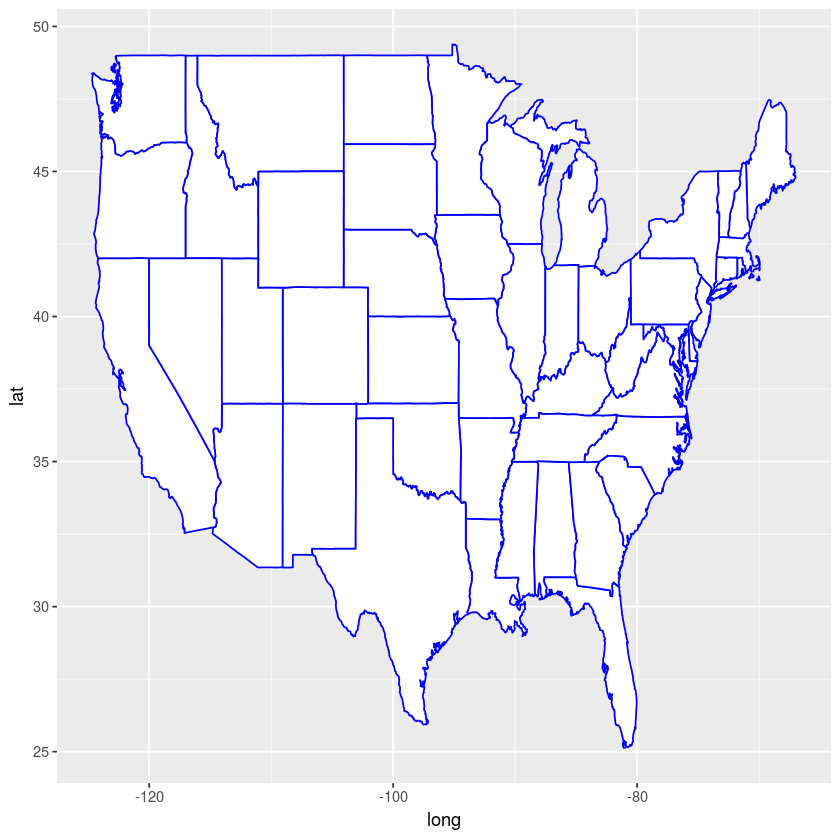

In [12]:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "blue")

In [2]:
polling = read.csv("PollingImputed.csv")

In [3]:
summary(polling)

         State          Year        Rasmussen         SurveyUSA      
 Arizona    :  3   Min.   :2004   Min.   :-41.000   Min.   :-33.000  
 Arkansas   :  3   1st Qu.:2004   1st Qu.:-10.000   1st Qu.:-11.000  
 California :  3   Median :2008   Median :  3.000   Median :  1.000  
 Colorado   :  3   Mean   :2008   Mean   :  2.048   Mean   :  1.359  
 Connecticut:  3   3rd Qu.:2012   3rd Qu.: 12.000   3rd Qu.: 16.000  
 Florida    :  3   Max.   :2012   Max.   : 39.000   Max.   : 30.000  
 (Other)    :127                                                     
   DiffCount           PropR          Republican    
 Min.   :-19.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: -6.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :  1.000   Median :0.6250   Median :1.0000  
 Mean   : -1.269   Mean   :0.5259   Mean   :0.5103  
 3rd Qu.:  4.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   : 11.000   Max.   :1.0000   Max.   :1.0000  
                                                    

In [4]:
table(polling$Year)


2004 2008 2012 
  50   50   45 

In [5]:
library(caTools)

In [6]:
Train = subset(polling, polling$Year != 2012)
Test = subset(polling, polling$Year == 2012)

In [7]:
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")
TestPrediction = predict(mod2, newdata=Test, type="response")
TestPredictionBinary = as.numeric(TestPrediction > 0.5)
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

In [8]:
summary(predictionDataFrame)

 TestPrediction      TestPredictionBinary       Test.State
 Min.   :0.0000001   Min.   :0.0000       Arizona    : 1  
 1st Qu.:0.0000926   1st Qu.:0.0000       Arkansas   : 1  
 Median :0.0648667   Median :0.0000       California : 1  
 Mean   :0.4852626   Mean   :0.4889       Colorado   : 1  
 3rd Qu.:0.9986385   3rd Qu.:1.0000       Connecticut: 1  
 Max.   :0.9998655   Max.   :1.0000       Florida    : 1  
                                          (Other)    :39  

In [9]:
table(predictionDataFrame$TestPredictionBinary)


 0  1 
23 22 

In [14]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)
predictionMap = merge(statesMap, predictionDataFrame, by = "region")
predictionMap = predictionMap[order(predictionMap$order),]

In [15]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


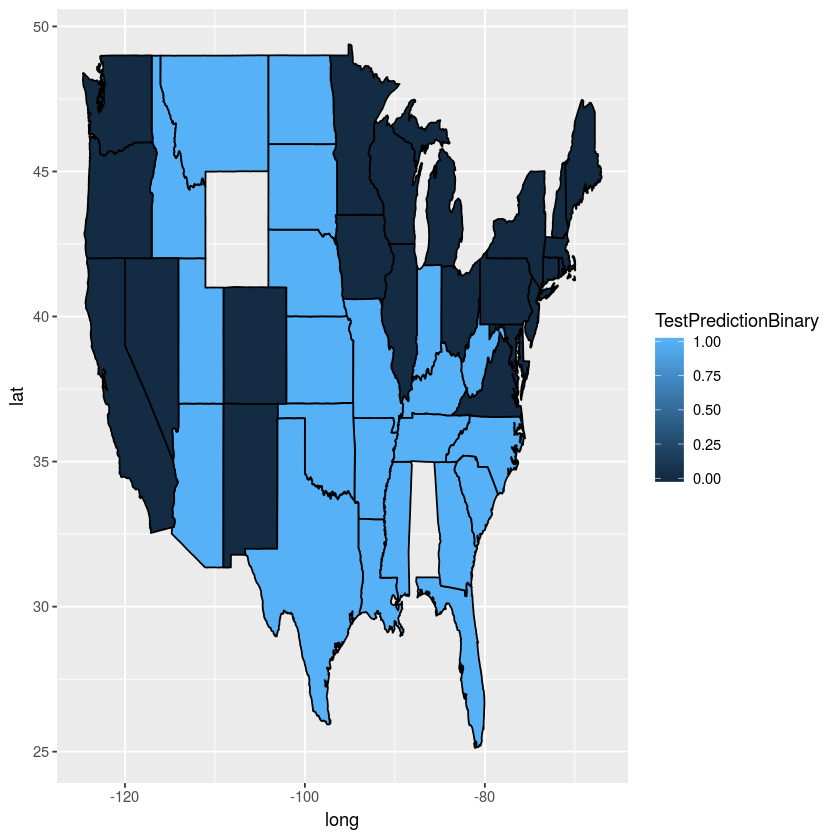

In [16]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + geom_polygon(color = "black")

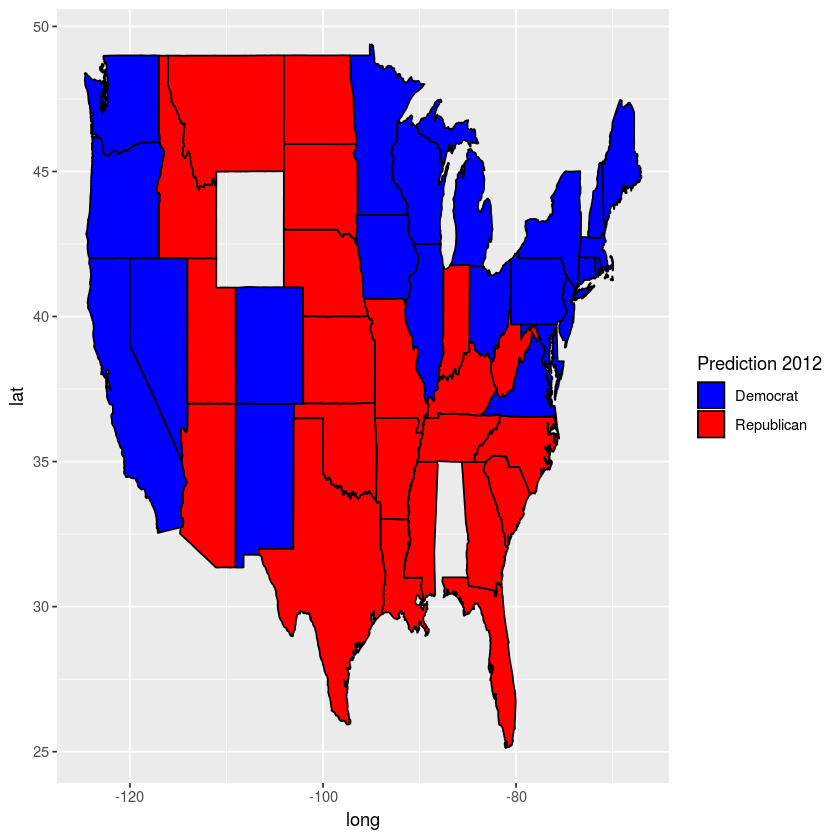

In [17]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

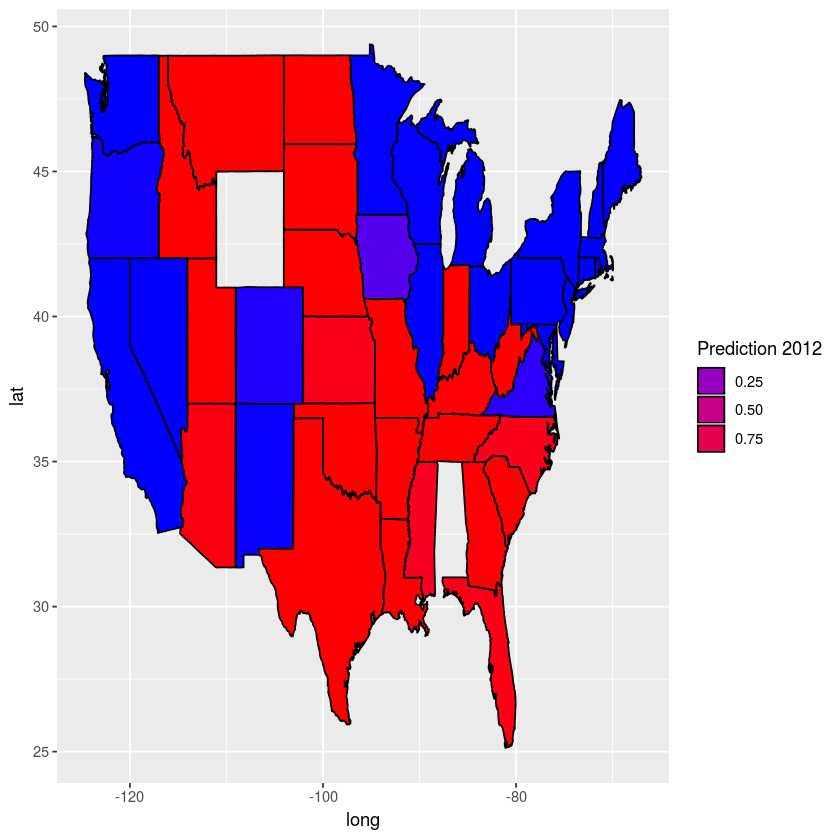

In [21]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", name = "Prediction 2012")

In [23]:
subset(predictionDataFrame, predictionDataFrame$Test.State == "Florida")

,TestPrediction,TestPredictionBinary,Test.State,region
24,0.9640395,1,Florida,florida


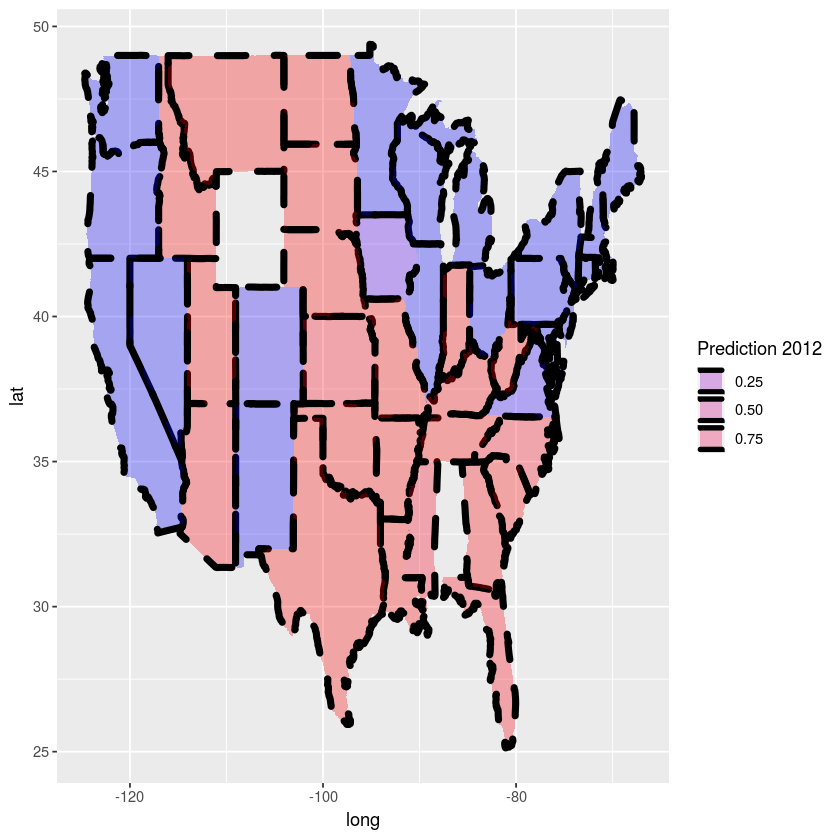

In [29]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ geom_polygon(color = "black", linetype = "dashed", size = 2, alpha = 0.3) + scale_fill_gradient(low = "blue", high = "red", guide = "legend", name = "Prediction 2012")

In [27]:
?geom_polygon